In [1]:
import os

DATA_FOLDER = 'data'
FIGURE_FOLDER = 'figures'

notebook_name = '000_filter_for_differentially_localized_proteins'

data_folder = os.path.join(DATA_FOLDER, notebook_name)
figure_folder = os.path.join(FIGURE_FOLDER, notebook_name)

! mkdir -p $data_folder
! mkdir -p $figure_folder

input_folder = os.path.join(DATA_FOLDER, '00_original')

In [2]:
import pandas as pd
import numpy as np

txt = os.path.join(input_folder, 'Annotation granularity levels.txt')
granularity = pd.read_table(txt)
print(granularity.shape)
granularity.head()

(29, 3)


,Level A,Level B,Level C
0,Nucleus,Nucleoplasm,Nucleus
1,Nucleoplasm,Nucleoplasm,Nucleus
2,Nuclear bodies,Nuclear bodies,Nucleus
3,Nuclear speckles,Nuclear bodies,Nucleus
4,Nuclear membrane,Nuclear membrane,Nucleus


In [3]:
pd.options.display.max_columns = 50

In [4]:
txt = os.path.join(input_folder, 'antibody_celline_location_v17.txt')
localization = pd.read_table(txt, index_col=0)
print(localization.shape)
localization.head()

(33456, 39)


,gene_name,uniprot_id,antibody_id,prest_id,aa_sequencing_sequence,tissue_name,Actin_filaments,Aggresome,Cell_Junctions,Centrosome,Cytokinetic_bridge,Cytoplasmic_bodies,Cytosol,Endoplasmic_reticulum,Endosomes,Focal_adhesion_sites,Golgi_apparatus,Intermediate_filaments,Lipid_droplets,Lysosomes,Microtubule_ends,Microtubule_organizing_center,Microtubules,Midbody,Midbody_ring,Mitochondria,Mitotic_spindle,Nuclear_bodies,Nuclear_membrane,Nuclear_speckles,Nucleoli,Nucleoli_fibrillar_center,Nucleoli_fibrillar_center.1,Nucleoplasm,Nucleus,Peroxisomes,Plasma_membrane,Rods_Rings,Vesicles
ensg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000130830,MPP1,Q00013,167,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,A-431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ENSG00000130830,MPP1,Q00013,167,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,U-2 OS,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ENSG00000130830,MPP1,Q00013,167,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,U-251 MG,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ENSG00000036473,OTC,P00480,243,230049,ILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQA...,A-431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000036473,OTC,P00480,243,230049,ILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQA...,U-2 OS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
nfc1 = localization['Nucleoli_fibrillar_center']
nfc2 = localization['Nucleoli_fibrillar_center.1']


(nfc1 == nfc2).all()

In [5]:
len(localization.index.unique())

11154

In [6]:
metadata = localization[['gene_name', 'uniprot_id', 'antibody_id', 'prest_id', 'aa_sequencing_sequence', 'tissue_name']]
metadata = metadata.drop_duplicates()
metadata = metadata.sort_index()
print(metadata.shape)
metadata.head()

(33456, 6)


,gene_name,uniprot_id,antibody_id,prest_id,aa_sequencing_sequence,tissue_name
ensg_id,,,,,,
ENSG00000000003,TSPAN6,O43657,4109,232547,NSFKNNYEKALKQYNSTGDYRSHAVDKIQNTLHCCGVTDYRDWTDT...,U-2 OS
ENSG00000000003,TSPAN6,O43657,4109,232547,NSFKNNYEKALKQYNSTGDYRSHAVDKIQNTLHCCGVTDYRDWTDT...,A-431
ENSG00000000003,TSPAN6,O43657,4109,232547,NSFKNNYEKALKQYNSTGDYRSHAVDKIQNTLHCCGVTDYRDWTDT...,U-251 MG
ENSG00000000457,SCYL3,Q8IZE3,5624,370001,PDWSEPEEPENQTVNIQIWPREPCDDVKSQCTTLDVEESSWDDCEP...,A-431
ENSG00000000457,SCYL3,Q8IZE3,5624,370001,PDWSEPEEPENQTVNIQIWPREPCDDVKSQCTTLDVEESSWDDCEP...,U-251 MG


In [7]:
metadata_multiple_seqs = metadata.groupby(level=0).filter(lambda x: len(x['aa_sequencing_sequence'].unique()) != 1)
print(metadata_multiple_seqs.shape)
metadata_multiple_seqs = metadata_multiple_seqs.sort_index()
print(len(metadata_multiple_seqs.index.unique()))
metadata_multiple_seqs.head()

(9644, 6)
1836


,gene_name,uniprot_id,antibody_id,prest_id,aa_sequencing_sequence,tissue_name
ensg_id,,,,,,
ENSG00000001629,ANKIB1,Q9P2G1,21780,2440003,QDPNINDNLLGNIMAWFHDMNPQSIALIPPATTEISADSQLPCIKD...,U-251 MG
ENSG00000001629,ANKIB1,Q9P2G1,21780,2440003,QDPNINDNLLGNIMAWFHDMNPQSIALIPPATTEISADSQLPCIKD...,A-431
ENSG00000001629,ANKIB1,Q9P2G1,19358,2440002,ASRSENQDSLQALSSLDEDDPNILLAIQLSLQESGLALDEETRDFL...,U-2 OS
ENSG00000001629,ANKIB1,Q9P2G1,21780,2440003,QDPNINDNLLGNIMAWFHDMNPQSIALIPPATTEISADSQLPCIKD...,U-2 OS
ENSG00000001629,ANKIB1,Q9P2G1,19358,2440002,ASRSENQDSLQALSSLDEDDPNILLAIQLSLQESGLALDEETRDFL...,U-251 MG


In [8]:
localization.head()

,gene_name,uniprot_id,antibody_id,prest_id,aa_sequencing_sequence,tissue_name,Actin_filaments,Aggresome,Cell_Junctions,Centrosome,Cytokinetic_bridge,Cytoplasmic_bodies,Cytosol,Endoplasmic_reticulum,Endosomes,Focal_adhesion_sites,Golgi_apparatus,Intermediate_filaments,Lipid_droplets,Lysosomes,Microtubule_ends,Microtubule_organizing_center,Microtubules,Midbody,Midbody_ring,Mitochondria,Mitotic_spindle,Nuclear_bodies,Nuclear_membrane,Nuclear_speckles,Nucleoli,Nucleoli_fibrillar_center,Nucleoli_fibrillar_center.1,Nucleoplasm,Nucleus,Peroxisomes,Plasma_membrane,Rods_Rings,Vesicles
ensg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000130830,MPP1,Q00013,167,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,A-431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ENSG00000130830,MPP1,Q00013,167,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,U-2 OS,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ENSG00000130830,MPP1,Q00013,167,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,U-251 MG,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ENSG00000036473,OTC,P00480,243,230049,ILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQA...,A-431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000036473,OTC,P00480,243,230049,ILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQA...,U-2 OS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
cols = localization.columns.difference(metadata.columns).append(pd.Index(['tissue_name']))
cell_line_localization = localization[cols]
cell_line_localization = cell_line_localization.set_index('tissue_name', append=True)
cell_line_localization = cell_line_localization.sort_index()
cell_line_localization = cell_line_localization.astype(bool)
print(cell_line_localization.shape)
cell_line_localization.head()

(33456, 33)


Actin_filaments  Aggresome  Cell_Junctions  \
ensg_id         tissue_name                                               
ENSG00000000003 A-431                  False      False           False   
                U-2 OS                 False      False           False   
                U-251 MG               False      False           False   
ENSG00000000457 A-431                  False      False           False   
                U-2 OS                 False      False           False   

                             Centrosome  Cytokinetic_bridge  \
ensg_id         tissue_name                                   
ENSG00000000003 A-431             False               False   
                U-2 OS            False               False   
                U-251 MG          False               False   
ENSG00000000457 A-431             False               False   
                U-2 OS            False               False   

                             Cytoplasmic_bodies  Cytosol  \
ensg_id         tissue_name                                
ENSG00000000003 A-431                     False     True   
                U-2 OS                    False     True   
                U-251 MG                  False     True   
ENSG00000000457 A-431                     False    False   
                U-2 OS                    False    False   

                             Endoplasmic_reticulum  Endosomes  \
ensg_id         tissue_name                                     
ENSG00000000003 A-431                        False      False   
                U-2 OS                       False      False   
                U-251 MG                     False      False   
ENSG00000000457 A-431                        False      False   
                U-2 OS                       False      False   

                             Focal_adhesion_sites  Golgi_apparatus  \
ensg_id         tissue_name                                          
ENSG00000000003 A-431                       False            False   
                U-2 OS                      False            False   
                U-251 MG                    False            False   
ENSG00000000457 A-431                       False            False   
                U-2 OS                      False            False   

                             Intermediate_filaments  Lipid_droplets  \
ensg_id         tissue_name                                           
ENSG00000000003 A-431                         False           False   
                U-2 OS                        False           False   
                U-251 MG                      False           False   
ENSG00000000457 A-431                         False           False   
                U-2 OS                        False           False   

                             Lysosomes  Microtubule_ends  \
ensg_id         tissue_name                                
ENSG00000000003 A-431            False             False   
                U-2 OS           False             False   
                U-251 MG         False             False   
ENSG00000000457 A-431            False             False   
                U-2 OS           False             False   

                             Microtubule_organizing_center  Microtubules  \
ensg_id         tissue_name                                                
ENSG00000000003 A-431                                False         False   
                U-2 OS                               False         False   
                U-251 MG                             False         False   
ENSG00000000457 A-431                                False          True   
                U-2 OS                               False          True   

                             Midbody  Midbody_ring  Mitochondria  \
ensg_id         tissue_name                                        
ENSG00000000003 A-431          False         False         False   
                U-2 OS         False 

In [10]:
cell_line_localization_tidy = cell_line_localization.replace(False, np.nan).stack().reset_index()
cell_line_localization_tidy = cell_line_localization_tidy.dropna()
cell_line_localization_tidy = cell_line_localization_tidy.drop(columns=[0])
cell_line_localization_tidy = cell_line_localization_tidy.rename(columns={"level_2": "cellular_component"})
print(cell_line_localization_tidy.shape)
cell_line_localization_tidy.head(10)

(50816, 3)


,ensg_id,tissue_name,cellular_component
0,ENSG00000000003,A-431,Cytosol
1,ENSG00000000003,U-2 OS,Cytosol
2,ENSG00000000003,U-251 MG,Cytosol
3,ENSG00000000457,A-431,Microtubules
4,ENSG00000000457,A-431,Nuclear_bodies
5,ENSG00000000457,U-2 OS,Microtubules
6,ENSG00000000457,U-251 MG,Microtubules
7,ENSG00000000457,U-251 MG,Nuclear_bodies
8,ENSG00000000460,A-431,Mitochondria
9,ENSG00000000460,U-251 MG,Mitochondria


Many of the ENSEMBL ids have multiple localizations per cell type

In [11]:
single_localization_per_celltype = cell_line_localization_tidy.groupby('ensg_id').filter(
    lambda x: len(x['tissue_name']) == len(x['tissue_name'].unique()))
print(single_localization_per_celltype.shape)
single_localization_per_celltype.head(20)

(10153, 3)


,ensg_id,tissue_name,cellular_component
0,ENSG00000000003,A-431,Cytosol
1,ENSG00000000003,U-2 OS,Cytosol
2,ENSG00000000003,U-251 MG,Cytosol
8,ENSG00000000460,A-431,Mitochondria
9,ENSG00000000460,U-251 MG,Mitochondria
13,"ENSG00000000971,ENSG00000244414",A-431,Vesicles
14,"ENSG00000000971,ENSG00000244414",U-251 MG,Vesicles
19,ENSG00000001167,A-431,Nucleoplasm
20,ENSG00000001167,RT4,Nucleoplasm
21,ENSG00000001167,U-2 OS,Nucleoplasm


How many ENSG ids have only one localization per cell?


In [12]:
len(single_localization_per_celltype['ensg_id'].unique())

4241

Remove ENSG ids tested in only one tissue

In [13]:
multiple_tissues_tested = single_localization_per_celltype.groupby('ensg_id').filter(lambda x: len(x['tissue_name']) > 1) 
print(multiple_tissues_tested.shape)
print(len(multiple_tissues_tested['ensg_id'].unique()))
multiple_tissues_tested.head()

(9410, 3)
3498


,ensg_id,tissue_name,cellular_component
0,ENSG00000000003,A-431,Cytosol
1,ENSG00000000003,U-2 OS,Cytosol
2,ENSG00000000003,U-251 MG,Cytosol
8,ENSG00000000460,A-431,Mitochondria
9,ENSG00000000460,U-251 MG,Mitochondria


Find ENSG ids with more than one cellular component

In [14]:
multiple_tissues_tested.groupby('ensg_id').apply(lambda x: len(x['cellular_component'].unique())).head()

ensg_id
ENSG00000000003                    1
ENSG00000000460                    1
ENSG00000000971,ENSG00000244414    1
ENSG00000001167                    1
ENSG00000001460                    1
dtype: int64

In [15]:
multiple_tissues_tested.groupby('ensg_id').apply(lambda x: len(x['cellular_component'])).head()

ensg_id
ENSG00000000003                    3
ENSG00000000460                    2
ENSG00000000971,ENSG00000244414    2
ENSG00000001167                    3
ENSG00000001460                    3
dtype: int64

In [16]:
differential_cell_line_localization = multiple_tissues_tested.groupby('ensg_id').filter(
    lambda x: len(x['cellular_component'].unique()) > 1)
print(differential_cell_line_localization.shape)
print(len(differential_cell_line_localization['ensg_id'].unique()))
differential_cell_line_localization.head(20)

(869, 3)
314


,ensg_id,tissue_name,cellular_component
95,ENSG00000003393,A-431,Cytosol
96,ENSG00000003393,U-2 OS,Intermediate_filaments
97,ENSG00000003393,U-251 MG,Cytosol
626,ENSG00000008086,A-431,Nucleoplasm
627,ENSG00000008086,U-2 OS,Cytosol
628,ENSG00000008086,U-251 MG,Nucleoplasm
692,ENSG00000008853,RT4,Aggresome
693,ENSG00000008853,U-2 OS,Plasma_membrane
773,ENSG00000010256,A-431,Cytosol
774,ENSG00000010256,U-2 OS,Mitochondria


In [17]:
from collections import Counter

multiple_localization_names = differential_cell_line_localization.groupby('ensg_id').apply(lambda x: ' - '.join(sorted(x['cellular_component'].unique()))).reset_index()
multiple_localization_names = multiple_localization_names.rename(columns={0: 'cellular_components'})
multiple_localization_names.head()


,ensg_id,cellular_components
0,ENSG00000003393,Cytosol - Intermediate_filaments
1,ENSG00000008086,Cytosol - Nucleoplasm
2,ENSG00000008853,Aggresome - Plasma_membrane
3,ENSG00000010256,Cytosol - Mitochondria
4,ENSG00000011405,Nucleoplasm - Nucleus


In [18]:
Counter(multiple_localization_names['cellular_components'])

Counter({'Actin_filaments - Cytosol': 4,
         'Actin_filaments - Nucleoplasm': 1,
         'Aggresome - Cytosol': 1,
         'Aggresome - Cytosol - Mitochondria': 1,
         'Aggresome - Plasma_membrane': 2,
         'Aggresome - Vesicles': 3,
         'Cell_Junctions - Cytosol': 5,
         'Cell_Junctions - Plasma_membrane': 2,
         'Cell_Junctions - Vesicles': 1,
         'Centrosome - Cytosol': 1,
         'Centrosome - Cytosol - Golgi_apparatus': 1,
         'Cytokinetic_bridge - Nucleus': 1,
         'Cytokinetic_bridge - Vesicles': 1,
         'Cytosol - Endoplasmic_reticulum': 7,
         'Cytosol - Golgi_apparatus': 7,
         'Cytosol - Golgi_apparatus - Vesicles': 1,
         'Cytosol - Intermediate_filaments': 4,
         'Cytosol - Microtubule_ends': 1,
         'Cytosol - Microtubule_organizing_center': 2,
         'Cytosol - Microtubules': 5,
         'Cytosol - Midbody': 1,
         'Cytosol - Mitochondria': 14,
         'Cytosol - Nucleoli - Vesicles': 1,
  

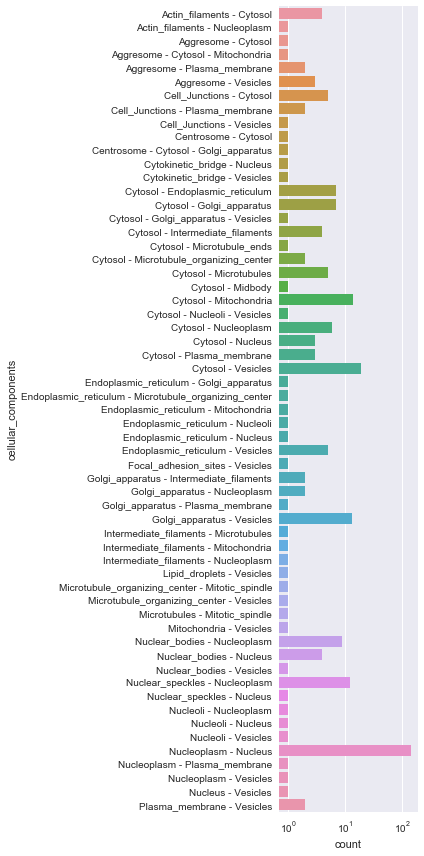

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='notebook')
%matplotlib inline

unique_locations = sorted(multiple_localization_names['cellular_components'].unique())

fig, ax = plt.subplots(figsize=(6, 12))
ax.set_xscale('log')
sns.countplot(y='cellular_components', 
              data=multiple_localization_names, order=unique_locations)
fig.tight_layout()
pdf = os.path.join(figure_folder, 'multiple_localizations_across_cell_lines.pdf')
fig.savefig(pdf)

Seems like a lot of within-order switching

In [20]:
type(('Nucleoli', 'Nucleoli fibrillar center'))

tuple

In [21]:
type({'Nucleoli', 'Nucleoli fibrillar center'})

set

In [22]:
{'Nuclear membrane'}

{'Nuclear membrane'}

In [23]:
cellular_component_orders = {
    'Nuclear membrane': {'Nuclear membrane',},
    'Nucleoli': {'Nucleoli', 'Nucleoli fibrillar center'},
    'Nucleoplasm': {'Nucleoplasm', 'Nuclear bodies', 'Nuclear speckles', 'Nucleus'},
    'Actin filaments': {'Actin filaments', 'Focal adhesion sites'},
    'Centrosome': {'Centrosome', 'Microtubule organizing center'},
    'Cytosol': {'Aggresome', 'Cytoplasmic bodies', 'Cytosol', 'Rods & rings'},
    'Intermediate filaments': {'Intermediate filaments'},
    'Microtubules': {'Cleavage furrow', 'Cytokinetic bridge', 'Microtubule ends', 'Microtubules', 
         'Midbody', 'Midbody ring', 'Mitotic spindle'},
    'Mitochondria': {'Mitochondria',},
    'Endoplasmic reticulum': {'Endoplasmic reticulum',},
    'Golgi apparatus': {'Golgi apparatus',},
    'Plasma membrane': {'Cell junctions', 'Plasma membrane'},
    'Secreted proteins': {'Secreted proteins',},
    'Vesicles': {'Endosomes', 'Lipid droplets', 'Lysosomes', 'Peroxisomes', 'Vesicles'}
}
cellular_component_orders = {k: set(map(lambda x: x.lower().replace(' ', '_'), v)) 
                             for k, v in cellular_component_orders.items()}
cellular_component_orders

{'Actin filaments': {'actin_filaments', 'focal_adhesion_sites'},
 'Centrosome': {'centrosome', 'microtubule_organizing_center'},
 'Cytosol': {'aggresome', 'cytoplasmic_bodies', 'cytosol', 'rods_&_rings'},
 'Endoplasmic reticulum': {'endoplasmic_reticulum'},
 'Golgi apparatus': {'golgi_apparatus'},
 'Intermediate filaments': {'intermediate_filaments'},
 'Microtubules': {'cleavage_furrow',
  'cytokinetic_bridge',
  'microtubule_ends',
  'microtubules',
  'midbody',
  'midbody_ring',
  'mitotic_spindle'},
 'Mitochondria': {'mitochondria'},
 'Nuclear membrane': {'nuclear_membrane'},
 'Nucleoli': {'nucleoli', 'nucleoli_fibrillar_center'},
 'Nucleoplasm': {'nuclear_bodies',
  'nuclear_speckles',
  'nucleoplasm',
  'nucleus'},
 'Plasma membrane': {'cell_junctions', 'plasma_membrane'},
 'Secreted proteins': {'secreted_proteins'},
 'Vesicles': {'endosomes',
  'lipid_droplets',
  'lysosomes',
  'peroxisomes',
  'vesicles'}}

In [24]:
def count_cellular_component_orders(locations):
    n_orders = 0
    for name, subnames in cellular_component_orders.items():
        if len(subnames.intersection(locations)) > 0:
            n_orders += 1
    return n_orders

differential_cell_line_localization['cellular_component_lower'] = differential_cell_line_localization['cellular_component'].str.lower()
n_orders = differential_cell_line_localization.groupby('ensg_id')['cellular_component_lower'].apply(count_cellular_component_orders)
n_orders.head()

/Users/olgabot/anaconda3/envs/sequence-localization-env/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ensg_id
ENSG00000003393    2
ENSG00000008086    2
ENSG00000008853    2
ENSG00000010256    2
ENSG00000011405    1
Name: cellular_component_lower, dtype: int64

In [25]:
n_orders.unique()

array([2, 1, 3])

In [26]:
ids_with_three_orders = n_orders[n_orders == 3].index
for x in ids_with_three_orders:
    print(x)

ENSG00000074964
ENSG00000163762
ENSG00000171877


In [27]:
differential_cell_line_localization.query('ensg_id in @ids_with_three_orders')

,ensg_id,tissue_name,cellular_component,cellular_component_lower
4273,ENSG00000074964,Hep G2,Golgi_apparatus,golgi_apparatus
4274,ENSG00000074964,RT4,Vesicles,vesicles
4275,ENSG00000074964,U-2 OS,Cytosol,cytosol
33791,ENSG00000163762,A549,Vesicles,vesicles
33792,ENSG00000163762,MCF7,Nucleoli,nucleoli
33793,ENSG00000163762,U-2 OS,Cytosol,cytosol
39052,ENSG00000171877,A-431,Golgi_apparatus,golgi_apparatus
39053,ENSG00000171877,U-2 OS,Cytosol,cytosol
39054,ENSG00000171877,U-251 MG,Centrosome,centrosome


In [29]:
cross_order_differential = differential_cell_line_localization.groupby('ensg_id').filter(
    lambda x: count_cellular_component_orders(x['cellular_component_lower']) > 1)
print(cross_order_differential.shape)
print(len(cross_order_differential['ensg_id'].unique()))
cross_order_differential.head()

(372, 4)
139


,ensg_id,tissue_name,cellular_component,cellular_component_lower
95,ENSG00000003393,A-431,Cytosol,cytosol
96,ENSG00000003393,U-2 OS,Intermediate_filaments,intermediate_filaments
97,ENSG00000003393,U-251 MG,Cytosol,cytosol
626,ENSG00000008086,A-431,Nucleoplasm,nucleoplasm
627,ENSG00000008086,U-2 OS,Cytosol,cytosol


In [30]:
from collections import Counter


cross_order_names = cross_order_differential.groupby('ensg_id').apply(lambda x: ' - '.join(sorted(x['cellular_component'].unique()))).reset_index()
cross_order_names = cross_order_names.rename(columns={0: 'cellular_components'})
cross_order_names.head()


,ensg_id,cellular_components
0,ENSG00000003393,Cytosol - Intermediate_filaments
1,ENSG00000008086,Cytosol - Nucleoplasm
2,ENSG00000008853,Aggresome - Plasma_membrane
3,ENSG00000010256,Cytosol - Mitochondria
4,ENSG00000039523,Cytosol - Golgi_apparatus


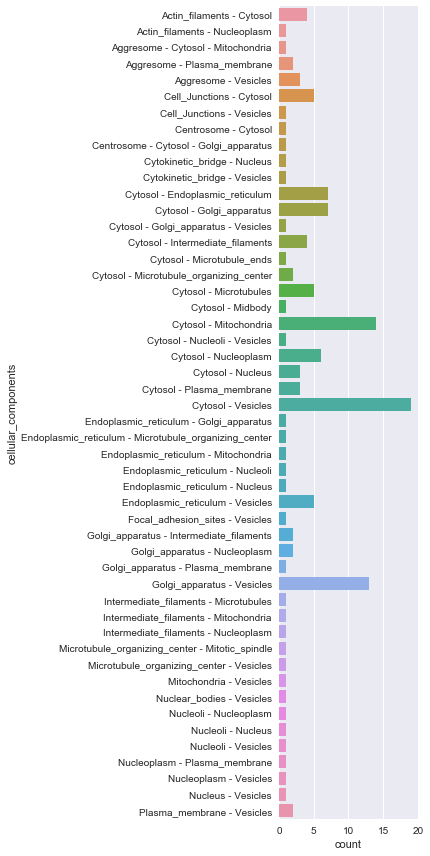

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='notebook')
%matplotlib inline

unique_locations = sorted(cross_order_names['cellular_components'].unique())

fig, ax = plt.subplots(figsize=(6, 12))
# ax.set_xscale('log')
sns.countplot(y='cellular_components', 
              data=cross_order_names, order=unique_locations)
fig.tight_layout()
pdf = os.path.join(figure_folder, 'multiple_localizations_across_cell_lines_cross_order.pdf')
fig.savefig(pdf)

In [32]:
differential_cell_line_localization.query('ensg_id == "ENSG00000253537"')

,ensg_id,tissue_name,cellular_component,cellular_component_lower
50170,ENSG00000253537,A549,Plasma_membrane,plasma_membrane
50171,ENSG00000253537,SH-SY5Y,Cell_Junctions,cell_junctions
50172,ENSG00000253537,U-2 OS,Cell_Junctions,cell_junctions


In [33]:
# def check_differential_localization(df):
#     return df.apply(lambda x: len(x.unique()) != 1)

# is_differentially_localized = cell_line_localization.groupby(level=0, axis=0).apply(check_differential_localization)
# print(is_differentially_localized.shape)
# is_differentially_localized.head()

# differential_localization = is_differentially_localized.loc[is_differentially_localized.any(axis=1), :]
# print(differential_localization.shape)
# differential_localization.head()

# Are all compartments fair game for differential localization?

# differential_localization.any()

# differential_localization.sum()

# differential_localization_na = differential_localization.replace(False, np.nan)
# differential_localization_na = differential_localization_na.dropna(how='all', axis=1)
# print(differential_localization_na.shape)
# differential_localization_na.head()

# differential_localization_tidy = differential_localization_na.unstack().reset_index()
# print(differential_localization_tidy.shape)
# differential_localization_tidy = differential_localization_tidy.dropna()
# differential_localization_tidy = differential_localization_tidy.rename(columns={'level_0': 'cellular_component'})
# differential_localization_tidy = differential_localization_tidy.drop(columns=[0])
# print(differential_localization_tidy.shape)
# differential_localization_tidy.head()

# differential_cellular_components = differential_localization_tidy.groupby('ensg_id').apply(lambda x: '|'.join(x['cellular_component']))
# print(differential_cellular_components.shape)
# differential_cellular_components.head()

## Read official file from website

In [34]:
txt = os.path.join(input_folder, 'subcellular_location.tsv')
subcellular_localization = pd.read_table(txt, index_col=0)
print(subcellular_localization.shape)
subcellular_localization.head()

(12073, 10)


,Gene name,Reliability,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id
Gene,,,,,,,,,,
ENSG00000000003,TSPAN6,Approved,NaN,NaN,Cytosol,NaN,NaN,NaN,NaN,Cytosol (GO:0005829)
ENSG00000000457,SCYL3,Uncertain,NaN,NaN,NaN,Microtubules;Nuclear bodies,NaN,NaN,NaN,Microtubules (GO:0015630);Nuclear bodies (GO:0...
ENSG00000000460,C1orf112,Approved,NaN,NaN,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria (GO:0005739)
ENSG00000000938,FGR,Approved,NaN,NaN,Aggresome;Plasma membrane,NaN,NaN,NaN,NaN,Aggresome (GO:0016235);Plasma membrane (GO:000...
ENSG00000000971,CFH,Approved,NaN,NaN,Vesicles,NaN,NaN,NaN,NaN,Vesicles (GO:0043231)


In [ ]:
subcellular_localization_spatial_variation = subcellular_localization.dropna(subset=['Single-cell variation spatial'])
print(subcellular_localization_spatial_variation.shape)
subcellular_localization_spatial_variation.head()